# La paradoja de la Inspección
Basado en la presentación de Allen Downey https://www.youtube.com/watch?v=cXWTHfvycyM

In [7]:

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.3.10-py3-none-any.whl size=10189 sha256=4296d2554e4b9f68fcb2edc1bde50fb2ba0c5675cd90d1afbbcb3540709f5f96
  Stored in directory: c:\users\yoda\appdata\local\pip\cache\wheels\10\1f\bf\40cf9e012f04d579e7a050f27db561ce8e587b22dc0a776f79
Successfully built empiricaldist


In [2]:
# Set the random seed so we get the same results every time
import numpy as np
np.random.seed(17)

In [3]:
import matplotlib.pyplot as plt

# FUncion para mejorar el grafico.
def decorate(**options):
    """Decorate the current axes."""
    ax = plt.gca()
    ax.set(**options)
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        plt.legend()
    plt.tight_layout()

## Cantidad de hijos

Importando datos del form

In [5]:
import pandas as pd

sheet_id = '1LE-PiXfSyzeMejdT4dwY7daE-RWMJZEmwEoG6HcA2qo'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv'
df = pd.read_csv(url)
df.columns = ['Horario', 'Numero de hijos']
df.head()

,Horario,Numero de hijos
0,15/12/2020 13:13:04,3


Obtener la columna

In [9]:
cantidadHijos = df['Numero de hijos'].copy()

Graficar la distribución

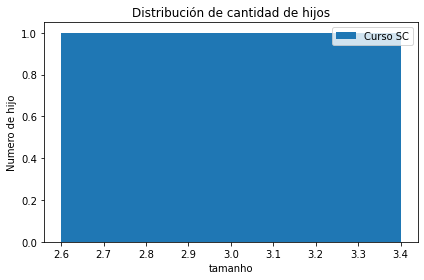

In [10]:
from empiricaldist import Pmf

pmf = Pmf.from_seq(cantidadHijos, normalize=False)
pmf.bar(label='Curso SC')

decorate(xlabel='tamanho',
         ylabel='Numero de hijo',
         title='Distribución de cantidad de hijos')

Caso alguien este bromenado

In [11]:
cantidadHijos[cantidadHijos > 15] = np.nan

La media de los datos está destinada a estimar la cantidad promedio de hijos de las familias en Paraguay?

¿Pero lo hace?

In [12]:
cantidadHijos.mean()

3.0

## Class size

Aquí están los datos que resumen la distribución de la cantidad de alumnos en las clases de pregrado en la Universidad de Purdue en 2013-14.


In [27]:
cantidadAlumnos = [(1, 1), 
         (2, 9),
         (10, 19),
         (20, 29),
         (30, 39),
         (40, 49),
         (50, 99),
         (100, 300)]
         
frecuencia = [138, 635, 1788, 1979, 796, 354, 487, 333]

Genero una muestra de esta distribución, asumiendo una distribución uniforme en cada rango y un límite superior de 300.

In [28]:
def generate_sample(sizes, counts):
    """Generate a sample from a distribution.
    
    sizes: sequence of (low, high) pairs
    counts: sequence of integers
    
    returns: NumPy array
    """
    t = []
    for (low, high), count in zip(sizes, counts):
        print(low, high, count)
        sample = np.random.randint(low, high+1, count)
        t.extend(sample)
    return np.array(t)

La muestra "no sesgada" es como la ve la universidad, y cada clase tiene la misma probabilidad de estar en la muestra.

In [33]:
sinSesgo = generate_sample(cantidadAlumnos, frecuencia)

1 1 138
2 9 635
10 19 1788
20 29 1979
30 39 796
40 49 354
50 99 487
100 300 333


Para generar una muestra sesgada, utilizamos los valores mismos como ponderaciones y volvemos a muestrear con reemplazo.

In [34]:
def resample_weighted(sample, weights):
    """Generate a biased sample.
    
    sample: NumPy array
    weights: NumPy array
    
    returns: NumPy array
    """
    n = len(sample)
    p = weights / np.sum(weights)
    return np.random.choice(sample, n, p=p)

In [40]:
sesgada = resample_weighted(sinSesgo, sinSesgo)

Para trazar la distribución, utilizo KDE para estimar la función de densidad, luego la evalúo sobre la secuencia dada de "xs".

In [41]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def kdeplot(sample, xs, label=None, **options):
    """Use KDE to plot the density function.
    
    sample: NumPy array
    xs: NumPy array
    label: string
    """
    density = gaussian_kde(sample, **options).evaluate(xs)
    plt.plot(xs, density, label=label)
    decorate(ylabel='Pdf')


La siguiente gráfica muestra la distribución del tamaño de la clase tal como la ve el Decano y una muestra de estudiantes.

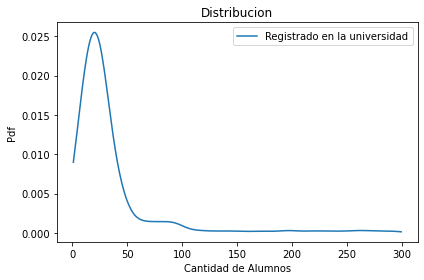

In [42]:
xs = np.arange(1, 300)
kdeplot(sinSesgo, xs, 'Registrado en la universidad')

decorate(xlabel='Cantidad de Alumnos',
         title='Distribucion')

plt.savefig('class_size0.png', dpi=150)

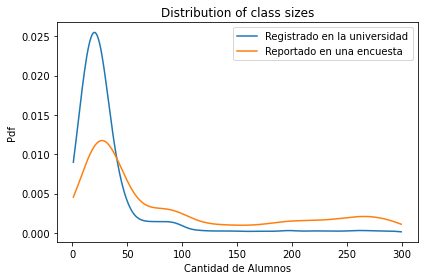

In [44]:
xs = np.arange(1, 300)
kdeplot(sinSesgo, xs, 'Registrado en la universidad')
kdeplot(sesgada, xs, 'Reportado en una encuesta')

decorate(xlabel='Cantidad de Alumnos',
         title='Distribution')

plt.savefig('class_size1.png', dpi=150)

Here are the means of the unbiased and biased distributions.

In [45]:
np.mean(sinSesgo)

34.43932411674347

In [46]:
np.mean(sesgada)

91.65714285714286

In [48]:
muestra= np.random.choice(sesgada, 500)

In [52]:
rePonderada= resample_weighted(muestra, 1/muestra)

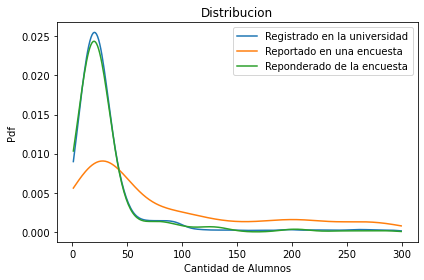

In [53]:
xs = np.arange(1, 300)
kdeplot(sinSesgo, xs, 'Registrado en la universidad')
kdeplot(muestra, xs, 'Reportado en una encuesta')
kdeplot(rePonderada, xs, 'Reponderado de la encuesta')

decorate(xlabel='Cantidad de Alumnos',
         title='Distribucion')

